In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\DIWAKAR YADAV\Downloads\after_EDA_dataset.csv")

In [3]:
df.head()

,brand,price,reting,is_5g,is_nfc,is_ir_blaster,processor_brand,core,proccessor_speed,ram,internal_memory,battery_size,fast_charge,charging_speed,rear_mp,front_mp,os,display_size,refresh_rate
0,Samsung,74999,92.0,1,1.0,0,Snapdragon,8,3.30,12.0,256,5000,1,45,200,12,Android,6.80,120
1,Oneplus,24997,83.0,1,0.0,1,Dimensity,8,3.35,8.0,128,7100,1,80,50,16,Android,6.77,120
2,Apple,47999,81.0,1,1.0,0,Bionic,6,3.46,6.0,128,3349,1,20,48,12,iOS,6.10,60
3,Realme,16999,82.0,1,0.0,0,Dimensity,8,2.40,6.0,128,7000,1,60,50,50,Android,6.81,144
4,Samsung,33890,84.0,1,1.0,0,Exynos,10,3.11,8.0,128,4700,1,25,50,10,Android,6.70,120


In [4]:
df.shape

(901, 19)

->901 row and 19 col

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901 entries, 0 to 900
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             901 non-null    object 
 1   price             901 non-null    int64  
 2   reting            901 non-null    float64
 3   is_5g             901 non-null    int64  
 4   is_nfc            901 non-null    float64
 5   is_ir_blaster     901 non-null    int64  
 6   processor_brand   901 non-null    object 
 7   core              901 non-null    int64  
 8   proccessor_speed  901 non-null    float64
 9   ram               901 non-null    float64
 10  internal_memory   901 non-null    int64  
 11  battery_size      901 non-null    int64  
 12  fast_charge       901 non-null    int64  
 13  charging_speed    901 non-null    int64  
 14  rear_mp           901 non-null    int64  
 15  front_mp          901 non-null    int64  
 16  os                901 non-null    object 
 1

In [6]:
df.columns

Index(['brand', 'price', 'reting', 'is_5g', 'is_nfc', 'is_ir_blaster',
       'processor_brand', 'core', 'proccessor_speed', 'ram', 'internal_memory',
       'battery_size', 'fast_charge', 'charging_speed', 'rear_mp', 'front_mp',
       'os', 'display_size', 'refresh_rate'],
      dtype='object')

In [7]:
# all categoricol columns in df
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print(categorical_cols)


Index(['brand', 'processor_brand', 'os'], dtype='object')


->categorical col need to encode

In [8]:
# all numerical col
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(numerical_cols)


Index(['price', 'reting', 'is_5g', 'is_nfc', 'is_ir_blaster', 'core',
       'proccessor_speed', 'ram', 'internal_memory', 'battery_size',
       'fast_charge', 'charging_speed', 'rear_mp', 'front_mp', 'display_size',
       'refresh_rate'],
      dtype='object')


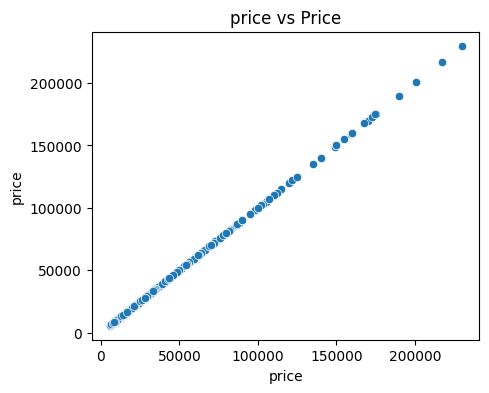

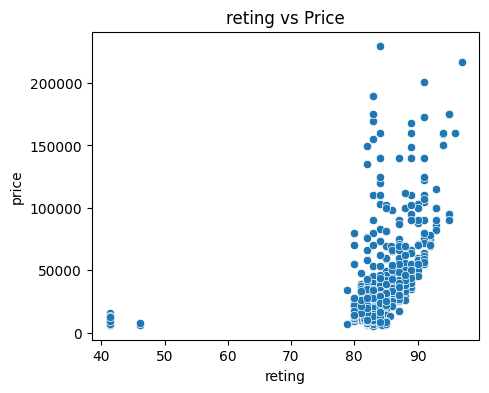

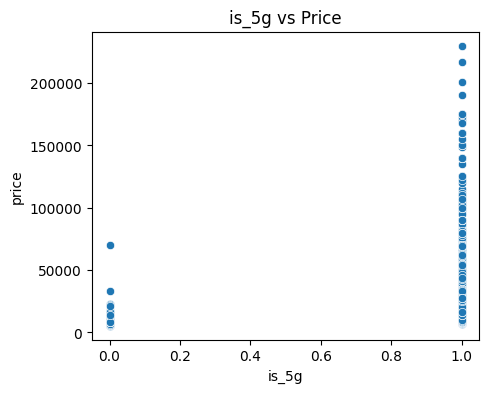

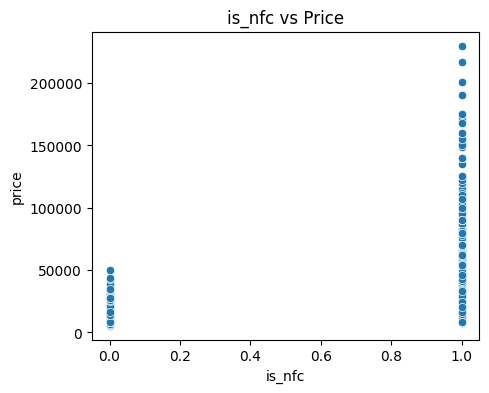

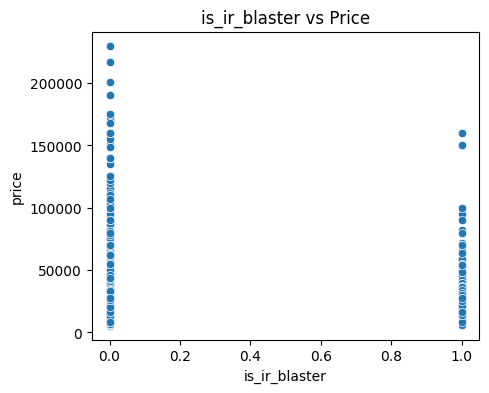

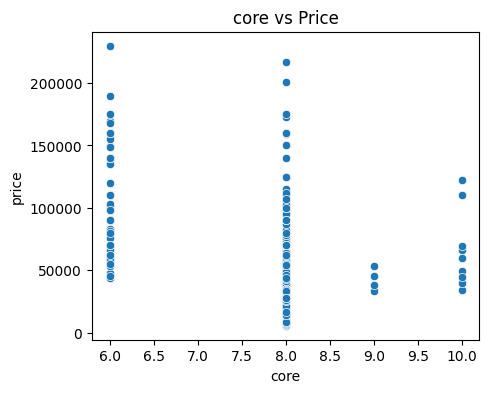

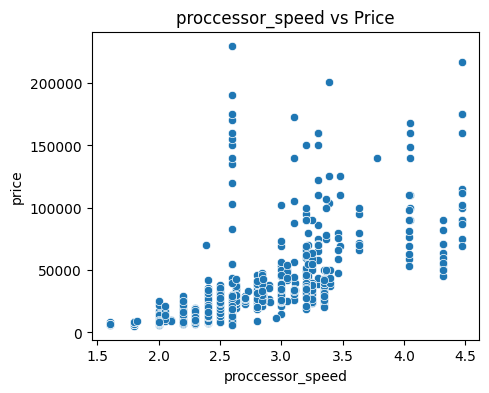

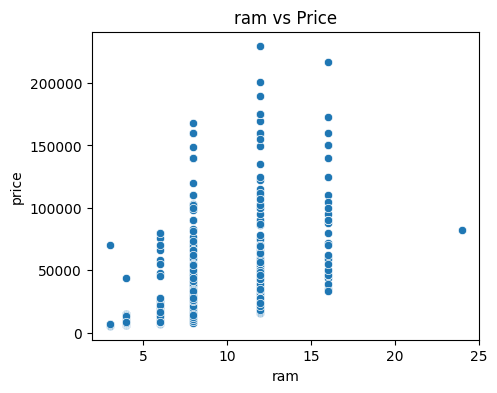

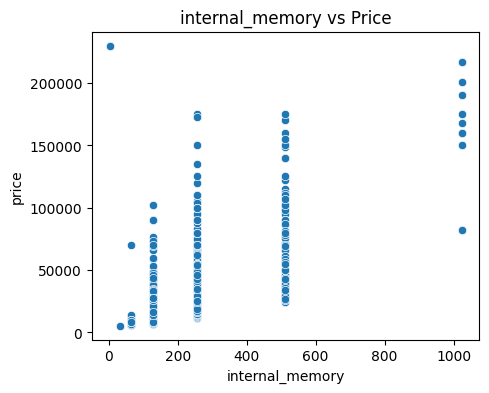

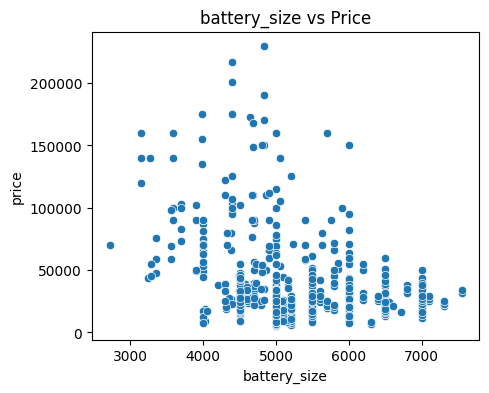

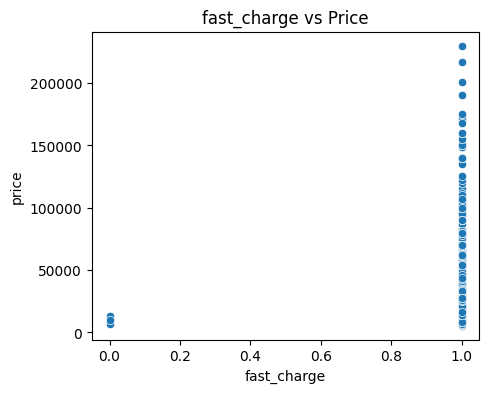

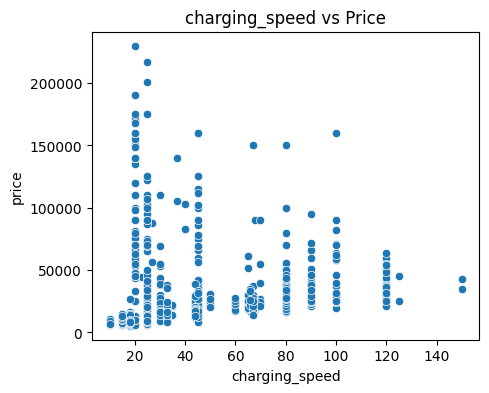

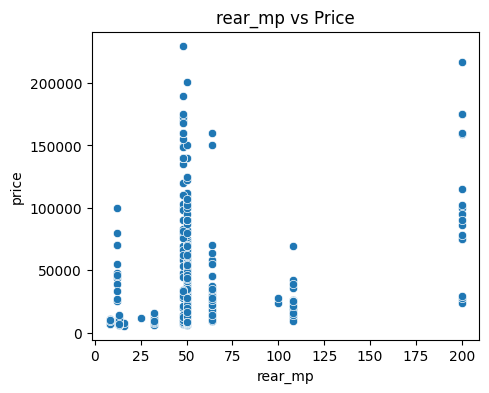

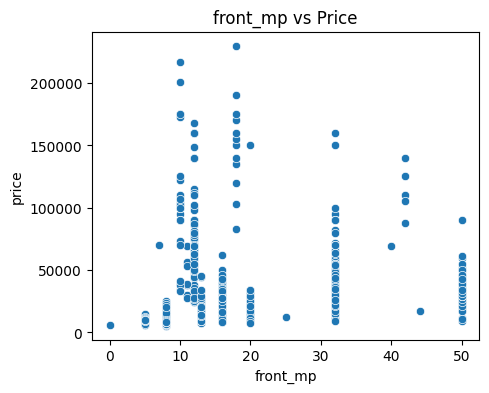

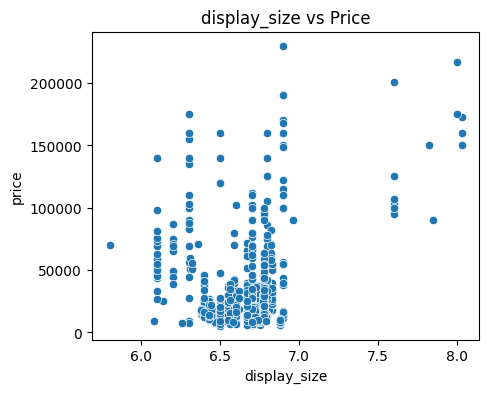

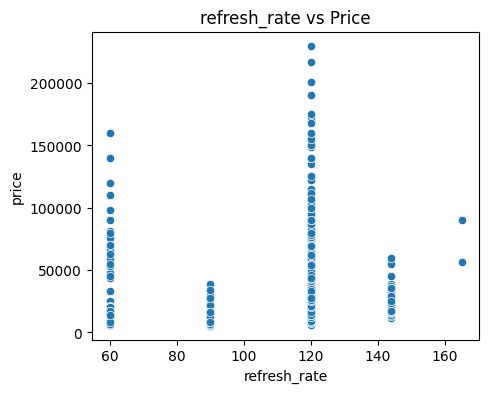

In [9]:
# scatter plot for numericol col
import seaborn as sns
for col in numerical_cols:
    plt.figure(figsize=(5,4))
    sns.scatterplot(x=df[col], y=df['price'])
    plt.title(f'{col} vs Price')
    plt.show()

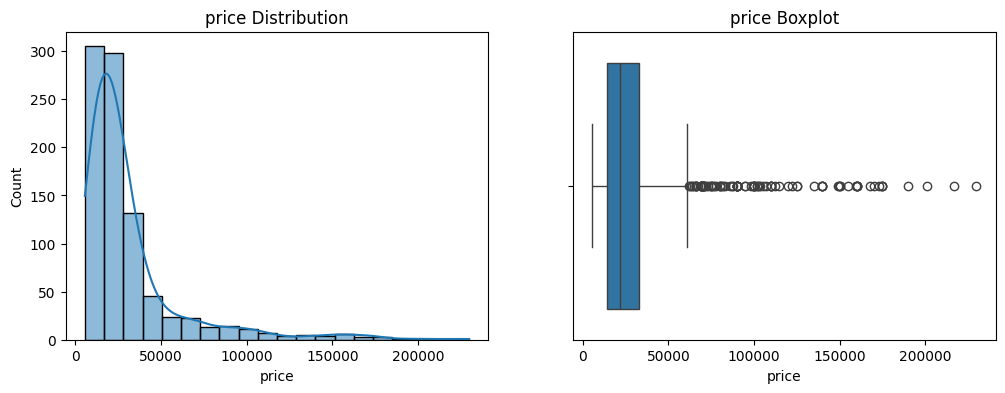

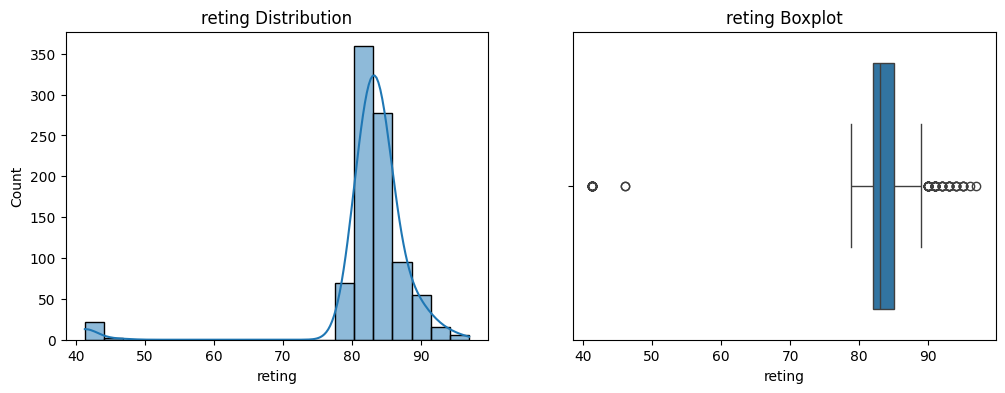

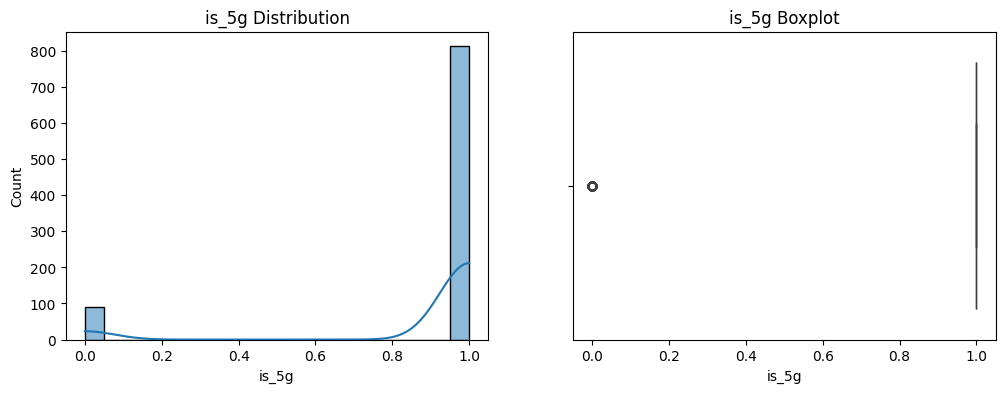

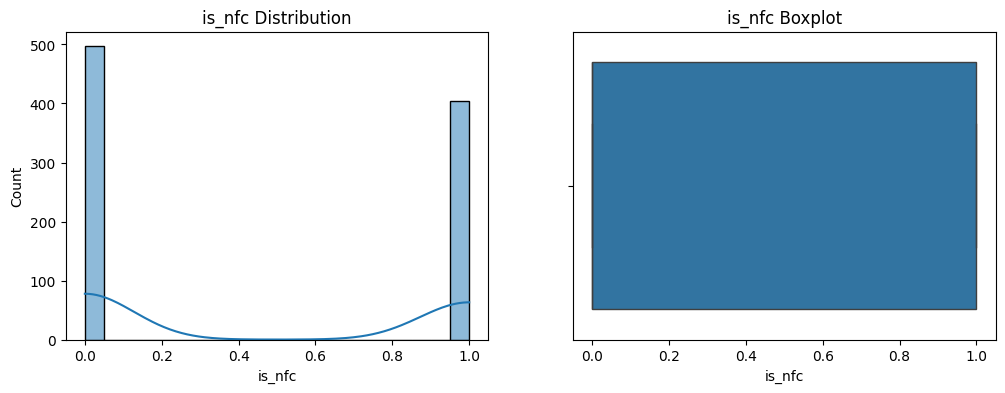

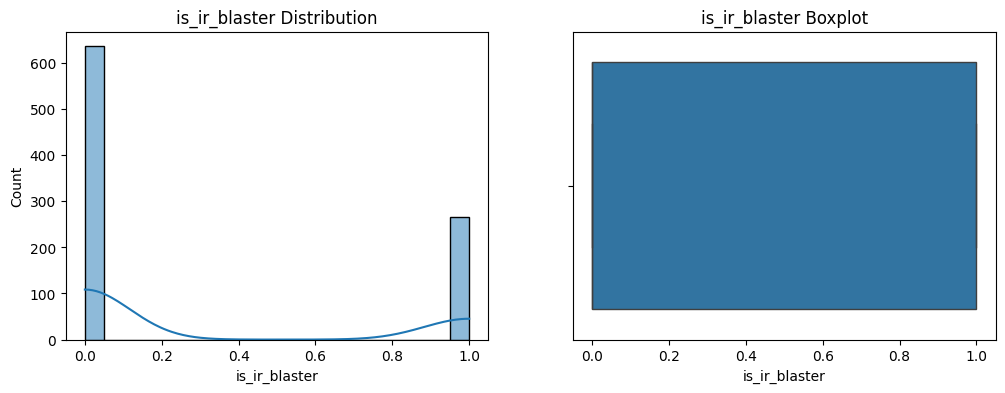

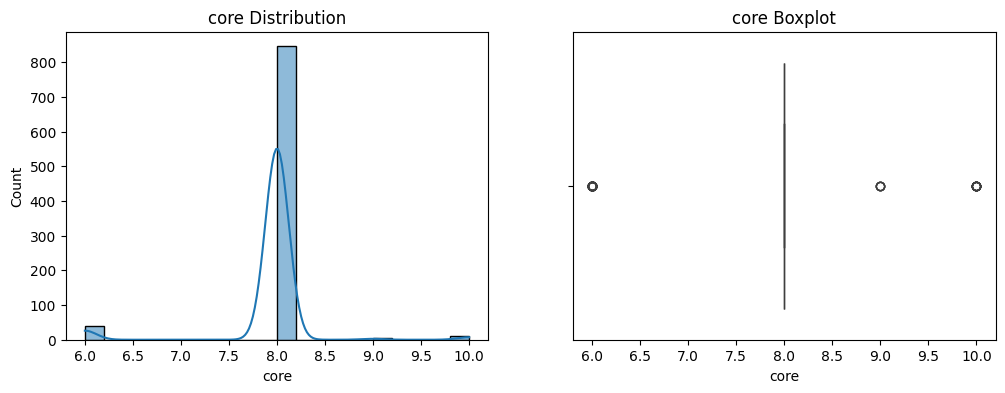

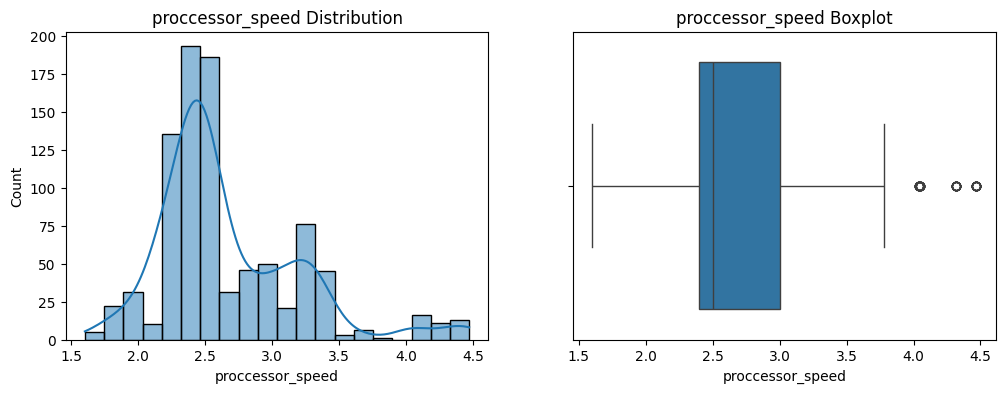

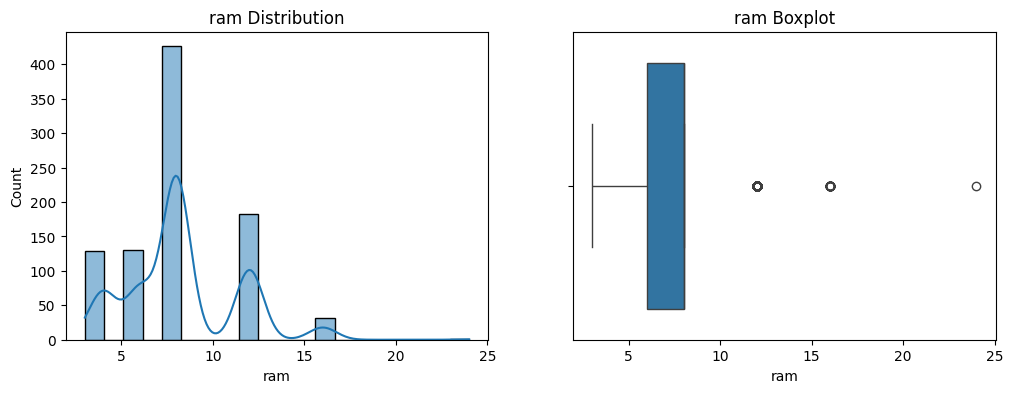

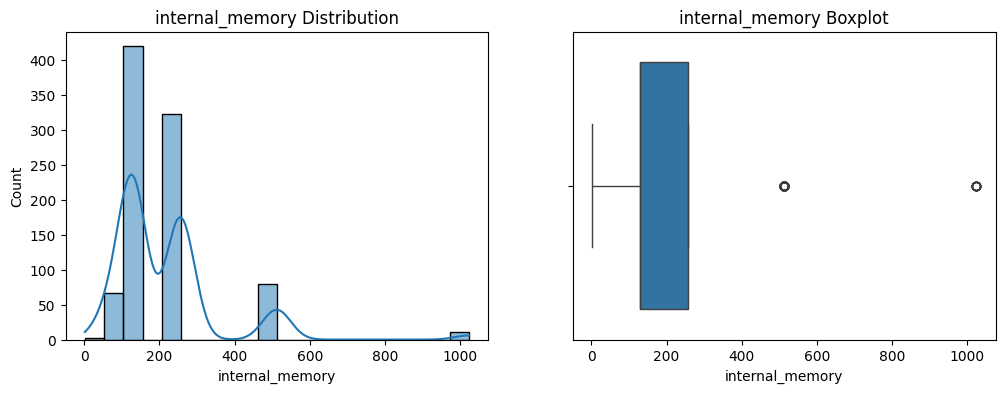

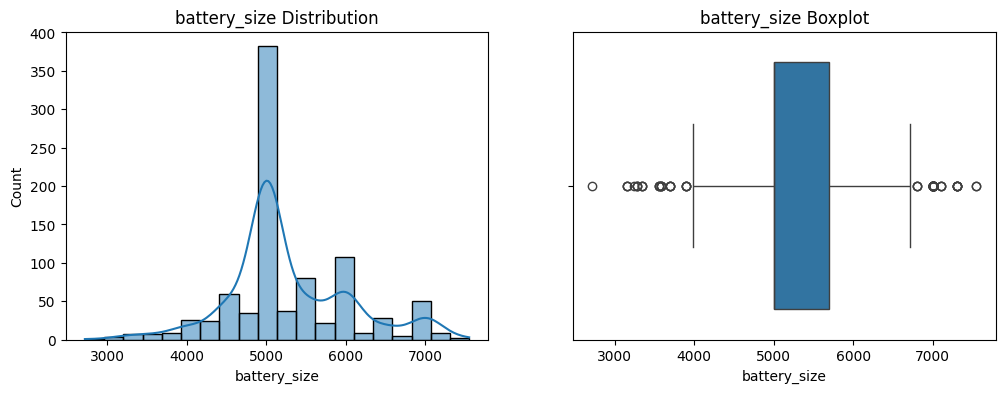

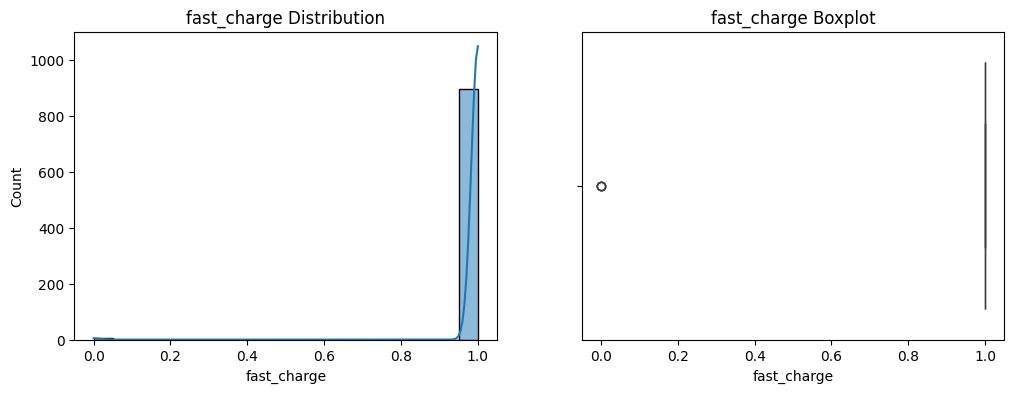

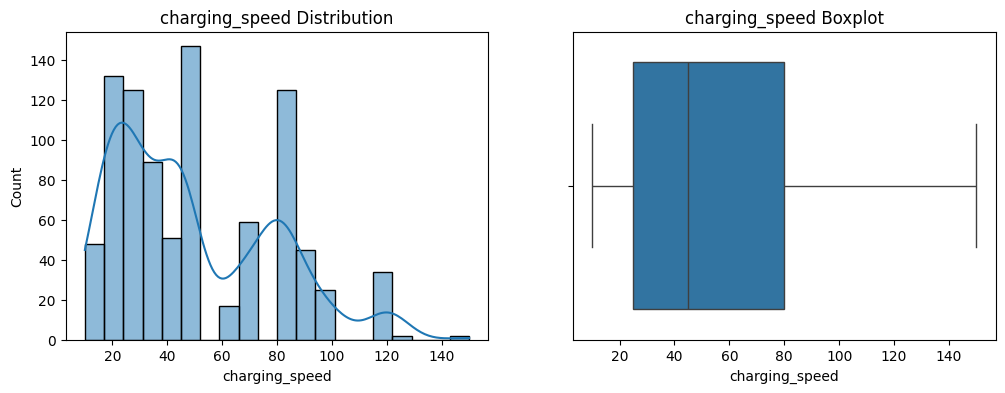

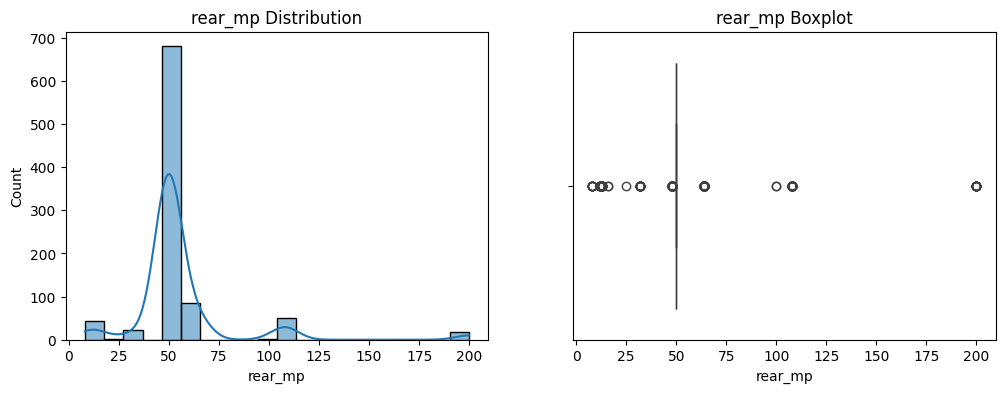

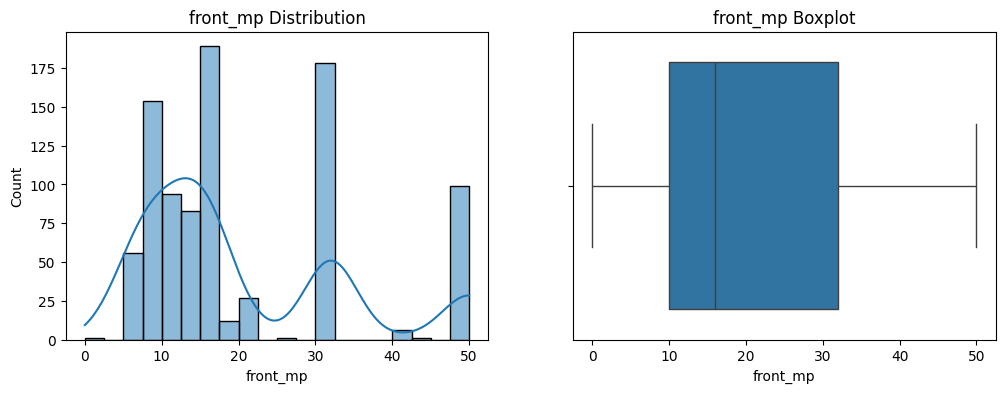

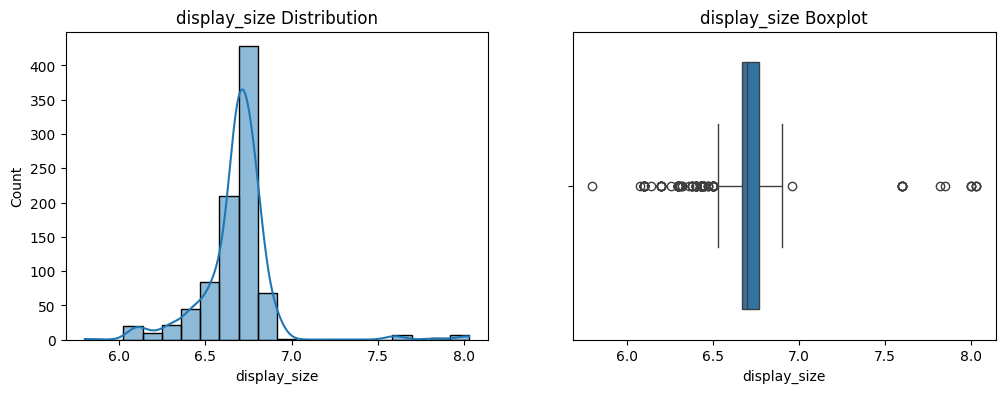

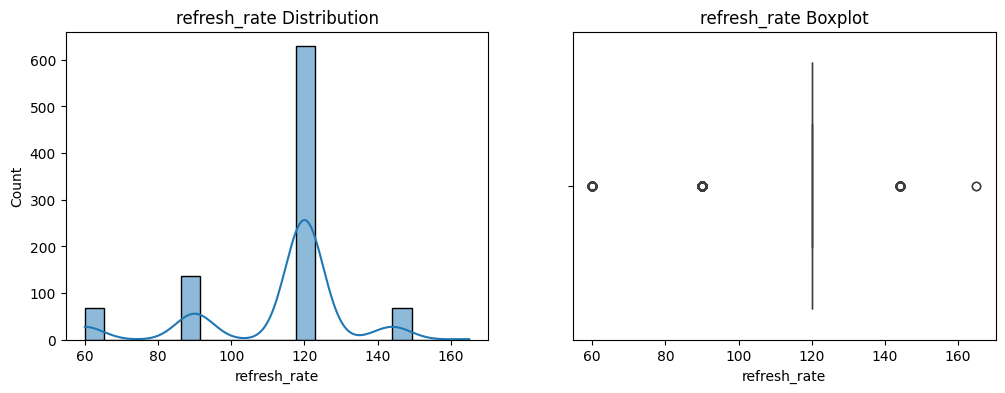

In [10]:
# numerical col disturibution
for col in numerical_cols:
    plt.figure(figsize=(12,4))
    
    # Histogram
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'{col} Distribution')
    
    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.title(f'{col} Boxplot')
    
    plt.show()

In [11]:
# correlation of numerical col
num_corr = (
    df[numerical_cols]
    .corr()
    ['price']
    .sort_values(ascending=False)
)

print(num_corr)


price               1.000000
internal_memory     0.678439
proccessor_speed    0.658290
ram                 0.535673
is_nfc              0.482734
reting              0.326060
display_size        0.239964
rear_mp             0.222221
is_5g               0.220074
front_mp            0.115250
refresh_rate        0.089812
charging_speed      0.064075
fast_charge         0.043297
is_ir_blaster      -0.045774
battery_size       -0.272072
core               -0.390338
Name: price, dtype: float64


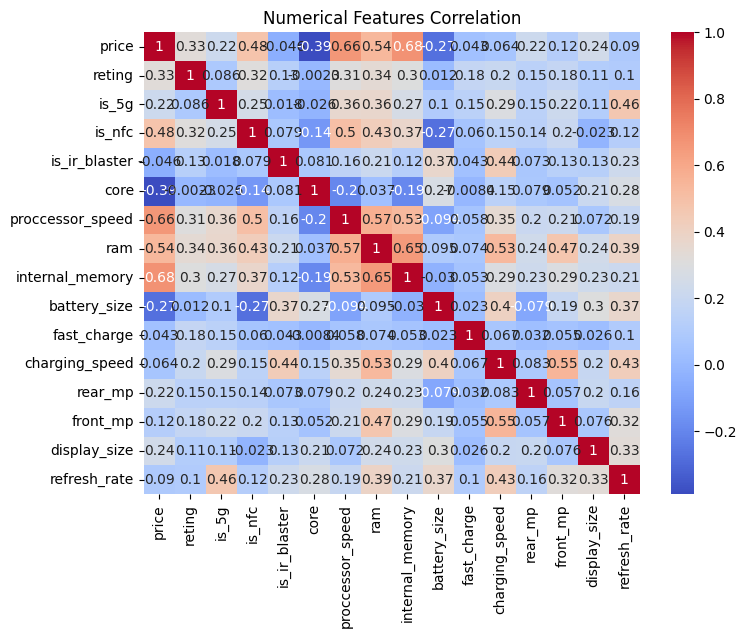

In [12]:
# numerical column corrrelation
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(
    df[numerical_cols].corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title("Numerical Features Correlation")
plt.show()


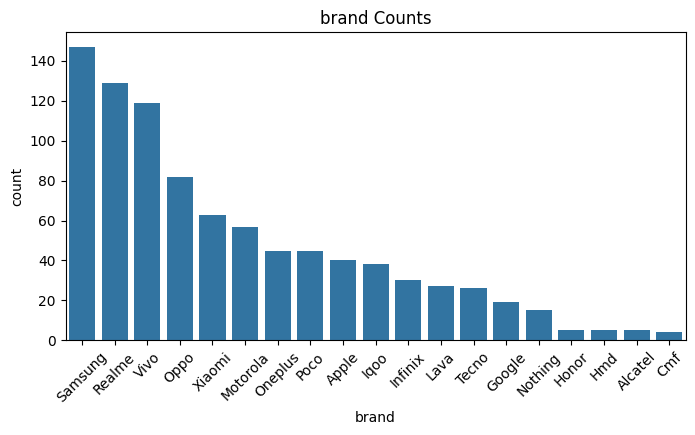

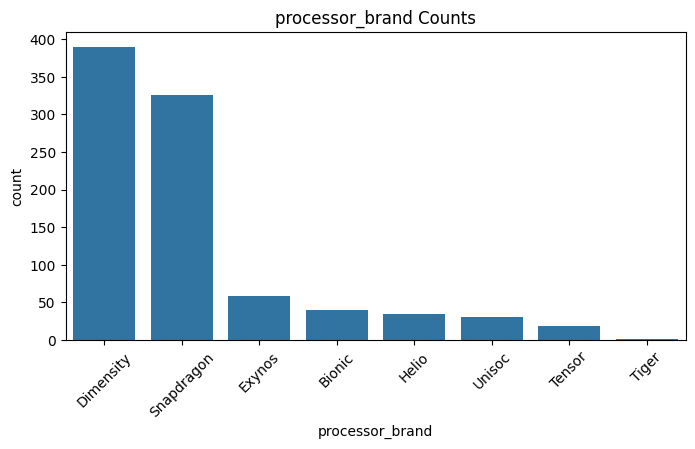

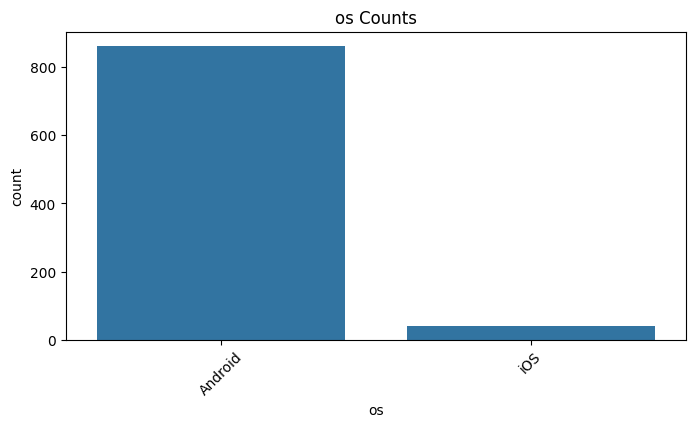

In [13]:
for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'{col} Counts')
    plt.xticks(rotation=45)
    plt.show()


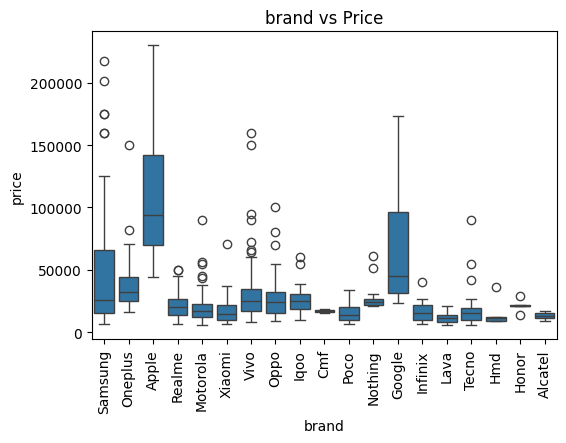

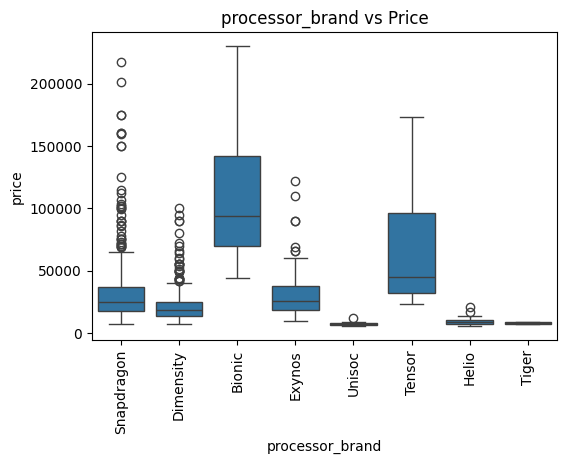

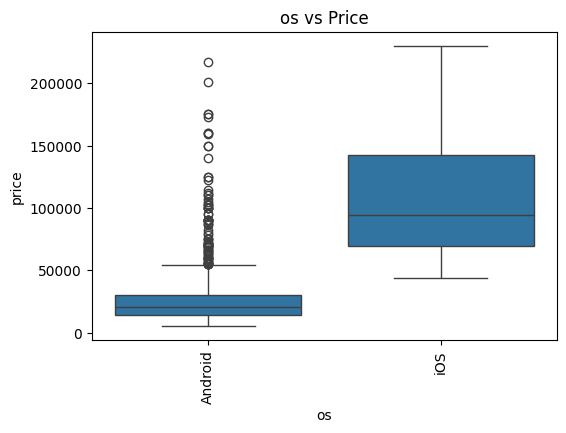

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col], y=df['price'])
    plt.title(f'{col} vs Price')
    plt.xticks(rotation=90)
    plt.show()

In [15]:
# categorical col
for col in categorical_cols:
    print(f"\nFeature: {col}")
    print(df.groupby(col)['price'].mean())



Feature: brand
brand
Alcatel      12999.000000
Apple       106457.725000
Cmf          16894.250000
Google       65950.631579
Hmd          15378.200000
Honor        21395.000000
Infinix      16275.366667
Iqoo         25480.078947
Lava         11169.666667
Motorola     20445.175439
Nothing      28332.600000
Oneplus      38325.622222
Oppo         26150.146341
Poco         15897.422222
Realme       21336.604651
Samsung      43416.714286
Tecno        19798.923077
Vivo         30192.226891
Xiaomi       17217.904762
Name: price, dtype: float64

Feature: processor_brand
processor_brand
Bionic        106457.725000
Dimensity      22227.015385
Exynos         33322.327586
Helio           9585.114286
Snapdragon     34946.015337
Tensor         65950.631579
Tiger           7996.000000
Unisoc          7457.645161
Name: price, dtype: float64

Feature: os
os
Android     27676.367015
iOS        106457.725000
Name: price, dtype: float64


In [16]:
# encoding categoricol column

In [17]:
df_encoded = pd.get_dummies(
    df,
    columns=categorical_cols,
    drop_first=True
)


In [18]:
df_encoded.shape

(901, 42)

-> after encoding (one hot encoding)
-> 901 row but 42 col

In [19]:
df[categorical_cols].nunique()

brand              19
processor_brand     8
os                  2
dtype: int64

total [19+8+2=29-3=26 & 19-3=16] total col=16+26=42

In [20]:
df_encoded.head()

,price,reting,is_5g,is_nfc,is_ir_blaster,core,proccessor_speed,ram,internal_memory,battery_size,...,brand_Vivo,brand_Xiaomi,processor_brand_Dimensity,processor_brand_Exynos,processor_brand_Helio,processor_brand_Snapdragon,processor_brand_Tensor,processor_brand_Tiger,processor_brand_Unisoc,os_iOS
0,74999,92.0,1,1.0,0,8,3.30,12.0,256,5000,...,False,False,False,False,False,True,False,False,False,False
1,24997,83.0,1,0.0,1,8,3.35,8.0,128,7100,...,False,False,True,False,False,False,False,False,False,False
2,47999,81.0,1,1.0,0,6,3.46,6.0,128,3349,...,False,False,False,False,False,False,False,False,False,True
3,16999,82.0,1,0.0,0,8,2.40,6.0,128,7000,...,False,False,True,False,False,False,False,False,False,False
4,33890,84.0,1,1.0,0,10,3.11,8.0,128,4700,...,False,False,False,True,False,False,False,False,False,False


In [21]:
# all columns correlation
corr_with_target = (
    df_encoded.corr()
    ['price']          # replace with your target column
    .sort_values(ascending=False)
)

print(corr_with_target)


price                         1.000000
internal_memory               0.678439
proccessor_speed              0.658290
ram                           0.535673
os_iOS                        0.520787
brand_Apple                   0.520787
is_nfc                        0.482734
reting                        0.326060
display_size                  0.239964
rear_mp                       0.222221
is_5g                         0.220074
brand_Samsung                 0.173494
brand_Google                  0.163818
processor_brand_Tensor        0.163818
front_mp                      0.115250
processor_brand_Snapdragon    0.091158
refresh_rate                  0.089812
charging_speed                0.064075
brand_Oneplus                 0.052627
fast_charge                   0.043297
processor_brand_Exynos        0.018087
brand_Nothing                -0.011865
brand_Vivo                   -0.012290
brand_Honor                  -0.023445
brand_Cmf                    -0.030604
processor_brand_Tiger    

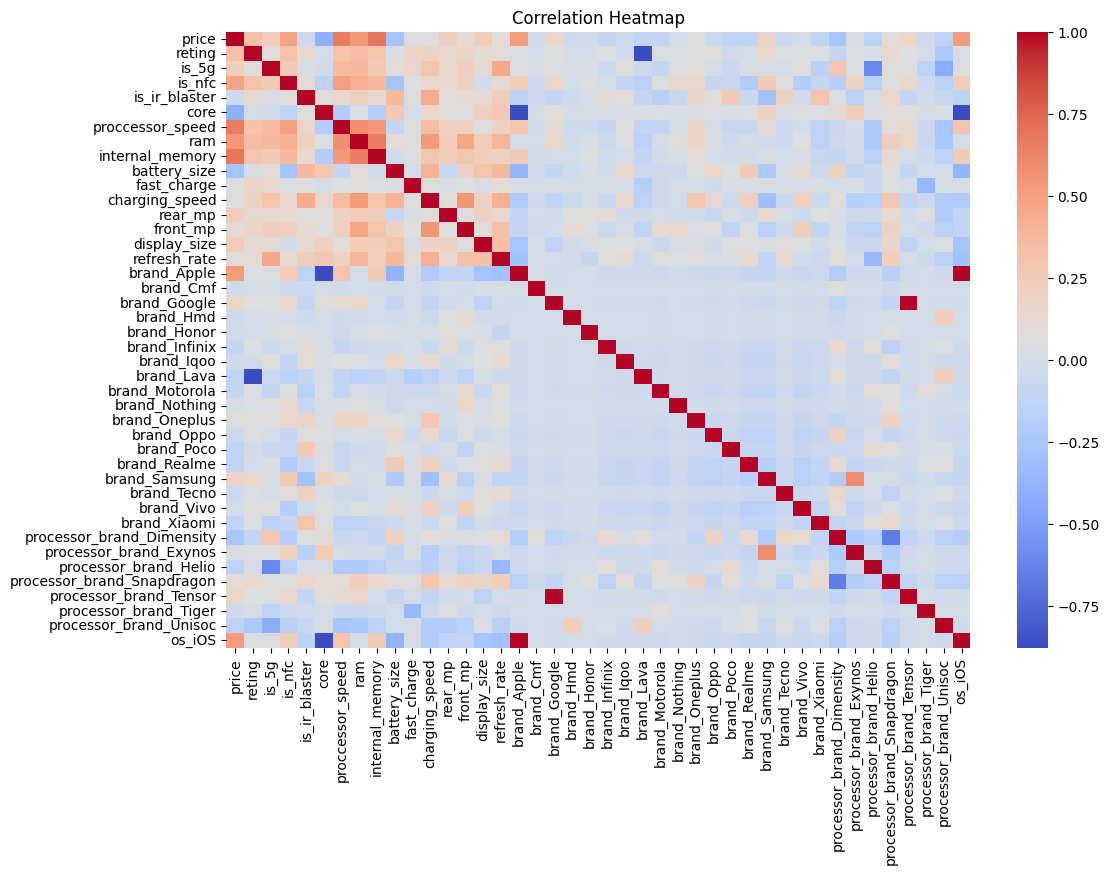

In [22]:
# full heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
sns.heatmap(df_encoded.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [23]:
X=df_encoded.drop(columns='price')
y=df_encoded['price']

In [24]:
X.shape

(901, 41)

In [25]:
# training the model without scaling the numerical columns

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [33]:
X_train.shape

(720, 41)

In [34]:
X_test.shape

(181, 41)

In [35]:
from sklearn.linear_model import LinearRegression
lr_no_scale = LinearRegression()
lr_no_scale.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [36]:
y_pred=lr_no_scale.predict(X_test)

In [37]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print("R2:", r2_score(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")



R2: 0.7446315591489348
Mean Absolute Error (MAE): 8549.60
Mean Squared Error (MSE): 133733058.05


-> result after withoutr scaling the data

In [38]:
# after scalling the data 

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_scaled = lr.predict(X_test_scaled)


In [41]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print("R2:", r2_score(y_test, y_pred_scaled))
mae = mean_absolute_error(y_test, y_pred_scaled)
mse = mean_squared_error(y_test, y_pred_scaled)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")



R2: 0.7446315591489363
Mean Absolute Error (MAE): 8549.60
Mean Squared Error (MSE): 133733058.05


-> scaling is not creating any effect on data

In [42]:
lr.coef_

array([ 3.47064748e+03, -2.21517836e+03,  2.17258880e+03,  3.15969494e+02,
        3.05429848e+03,  5.87108876e+03,  4.29400567e+03,  8.45008983e+03,
       -3.69218089e+03, -3.63962554e+02, -3.59464781e+03,  2.31192038e+03,
       -4.49179667e+02,  9.22416882e+03,  4.02079027e+03,  9.76016873e+03,
        4.74812213e+02,  2.68738383e+03,  3.21628189e+02,  5.84655493e+01,
       -4.54571843e+02,  2.18062259e+03,  3.81948398e+03,  1.65687334e+03,
        5.57511818e+02,  2.85403305e+03,  5.28328130e+03,  4.77347390e+02,
        4.16198392e+03,  8.29627913e+03, -1.35382135e+02,  6.17953417e+03,
        2.11280253e+03, -2.32393182e+03, -2.96193284e+03,  7.11567544e+01,
       -1.13899647e+03,  2.68738383e+03, -4.61086577e+02,  2.15699460e+00,
        9.76016873e+03])

In [43]:
lr.intercept_

np.float64(32033.28472222222)

In [44]:
coefficients = pd.Series(
    lr.coef_,
    index=X.columns
).sort_values(key=abs, ascending=False)

coefficients

brand_Apple                   9760.168734
os_iOS                        9760.168734
display_size                  9224.168824
internal_memory               8450.089827
brand_Samsung                 8296.279126
brand_Vivo                    6179.534168
proccessor_speed              5871.088764
brand_Oppo                    5283.281297
ram                           4294.005666
brand_Realme                  4161.983923
refresh_rate                  4020.790271
brand_Lava                    3819.483975
battery_size                 -3692.180894
charging_speed               -3594.647807
reting                        3470.647484
core                          3054.298476
processor_brand_Exynos       -2961.932836
brand_Oneplus                 2854.033048
processor_brand_Tensor        2687.383832
brand_Google                  2687.383832
processor_brand_Dimensity    -2323.931824
rear_mp                       2311.920376
is_5g                        -2215.178364
brand_Iqoo                    2180

In [45]:
coefficients<0

brand_Apple                   False
os_iOS                        False
display_size                  False
internal_memory               False
brand_Samsung                 False
brand_Vivo                    False
proccessor_speed              False
brand_Oppo                    False
ram                           False
brand_Realme                  False
refresh_rate                  False
brand_Lava                    False
battery_size                   True
charging_speed                 True
reting                        False
core                          False
processor_brand_Exynos         True
brand_Oneplus                 False
processor_brand_Tensor        False
brand_Google                  False
processor_brand_Dimensity      True
rear_mp                       False
is_5g                          True
brand_Iqoo                    False
is_nfc                        False
brand_Xiaomi                  False
brand_Motorola                False
processor_brand_Snapdragon  

<Axes: ylabel='price'>

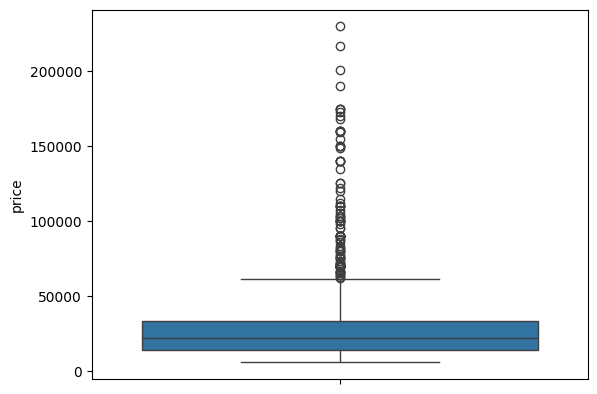

In [46]:
sns.boxplot(y=df['price'])

<Axes: ylabel='price'>

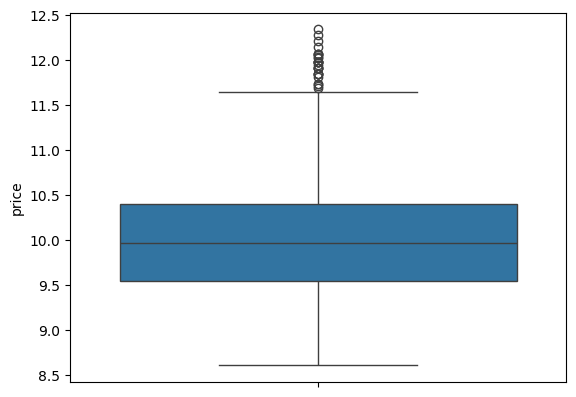

In [47]:
sns.boxplot(np.log1p(df_encoded['price']))


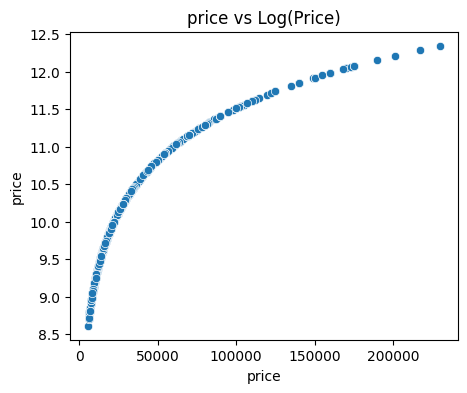

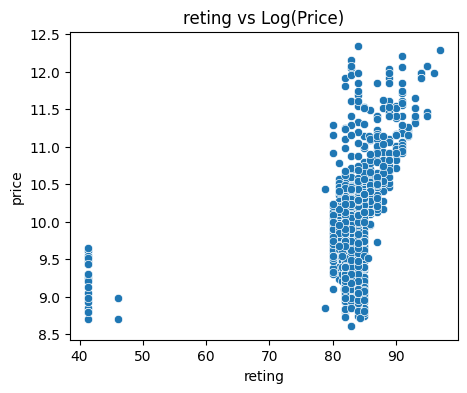

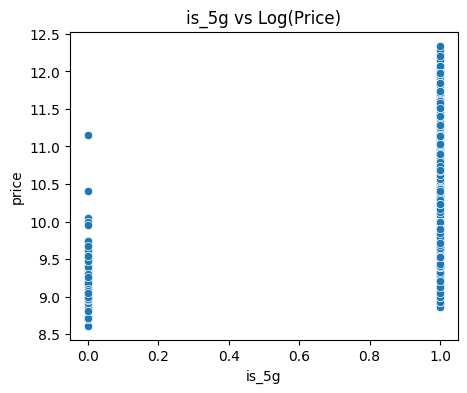

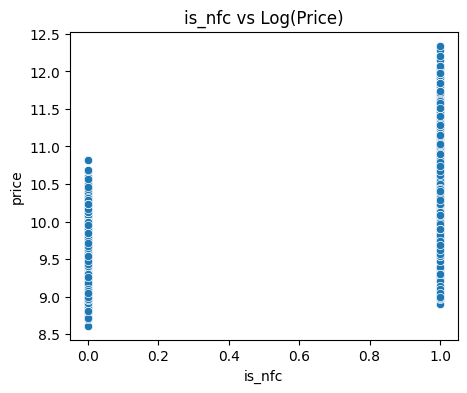

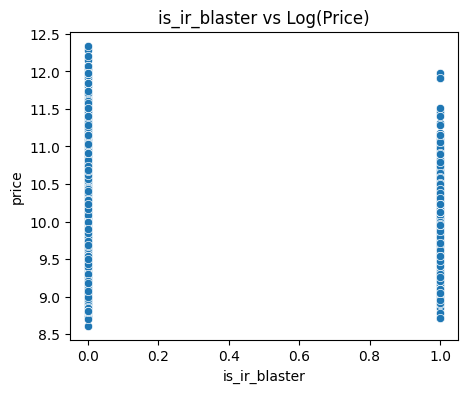

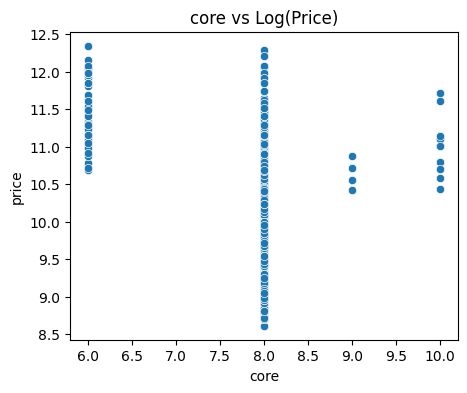

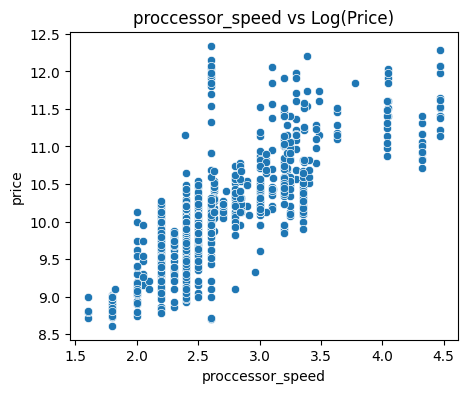

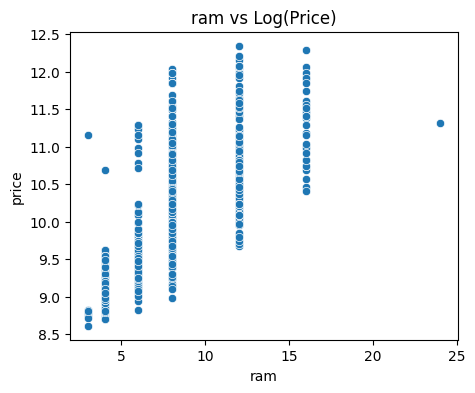

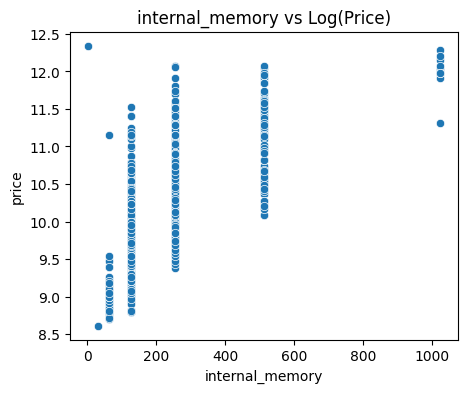

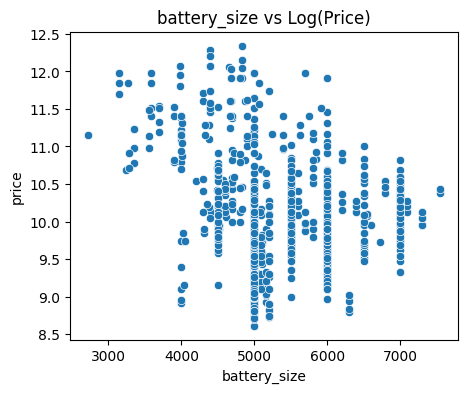

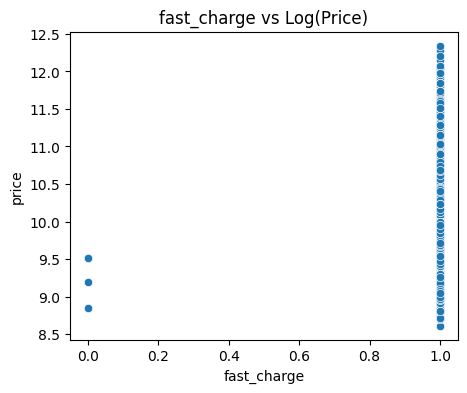

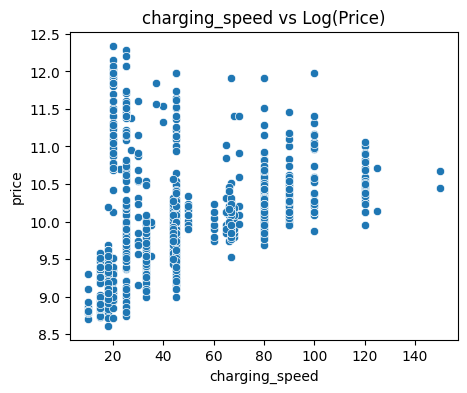

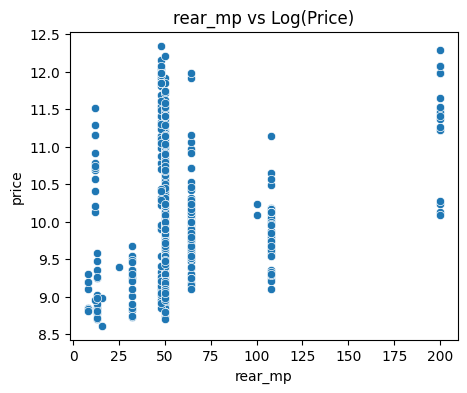

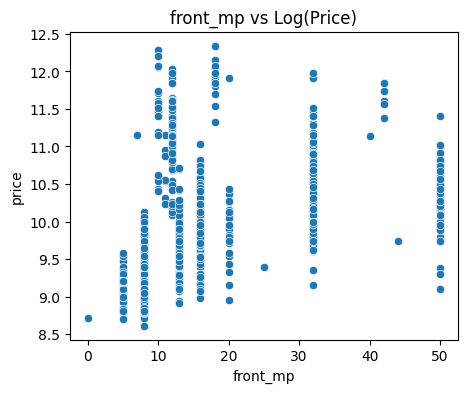

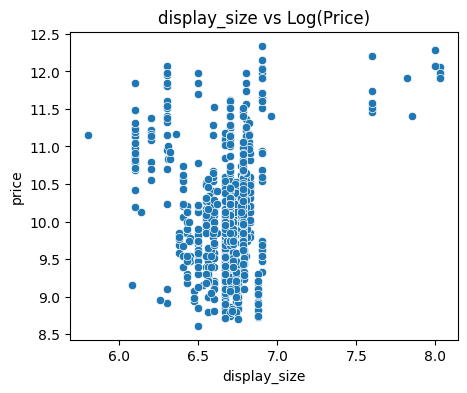

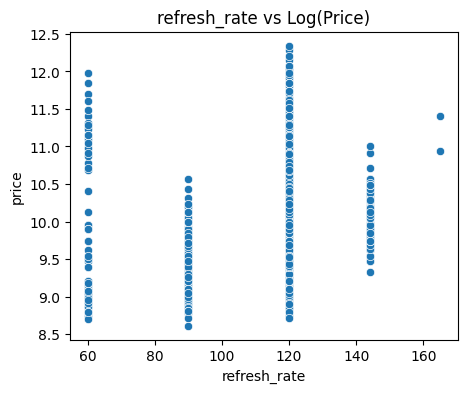

In [48]:
#log price
for col in numerical_cols:
    plt.figure(figsize=(5,4))
    sns.scatterplot(x=df[col], y=np.log1p(df['price']))
    plt.title(f'{col} vs Log(Price)')
    plt.show()


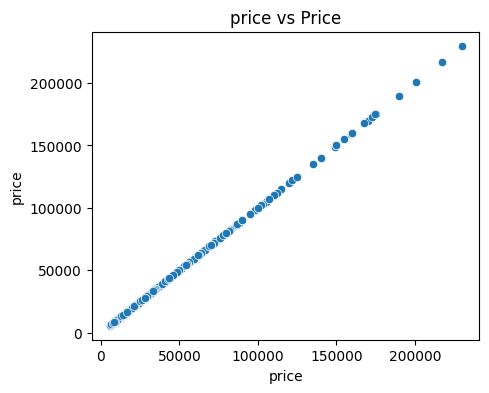

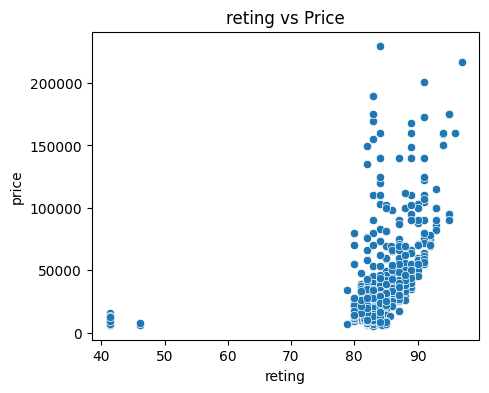

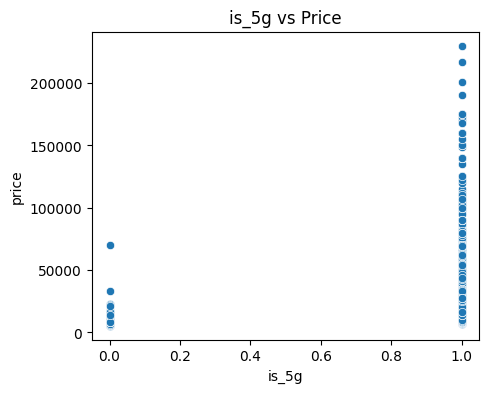

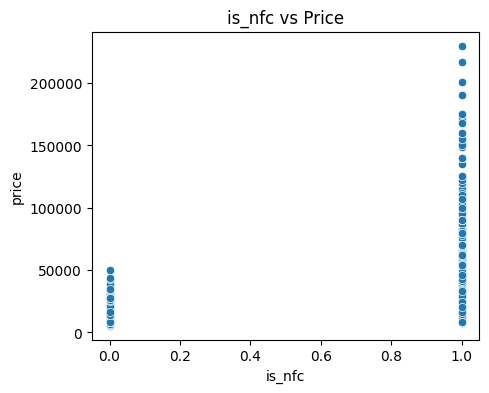

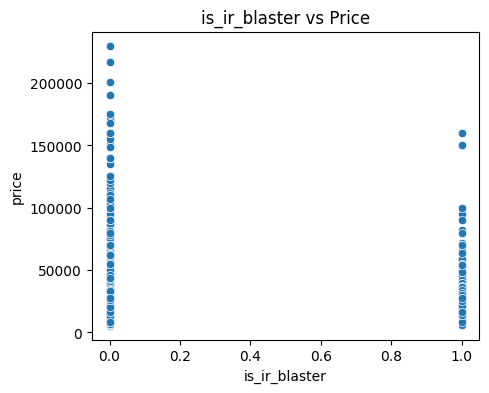

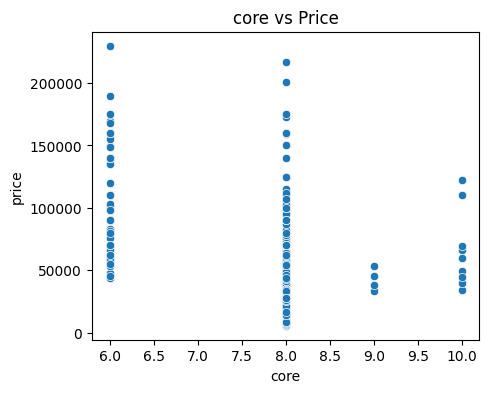

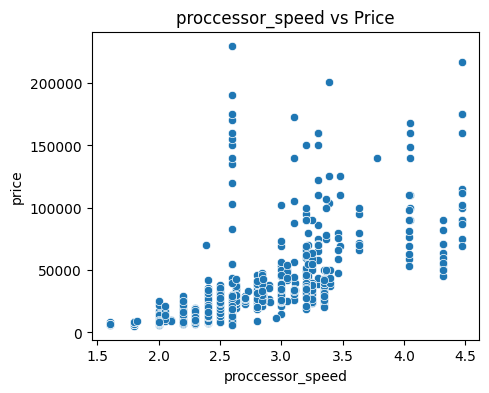

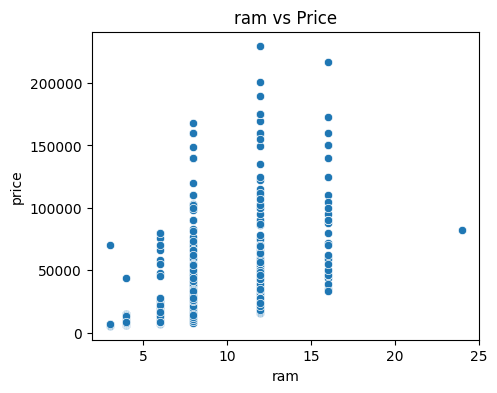

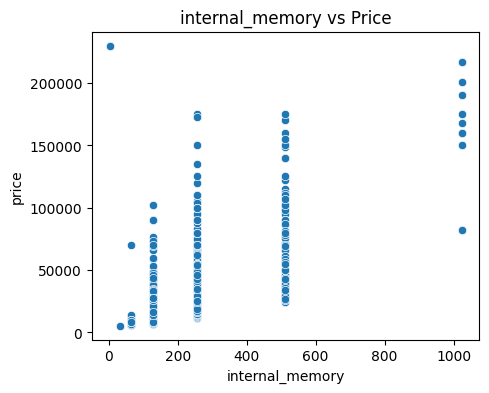

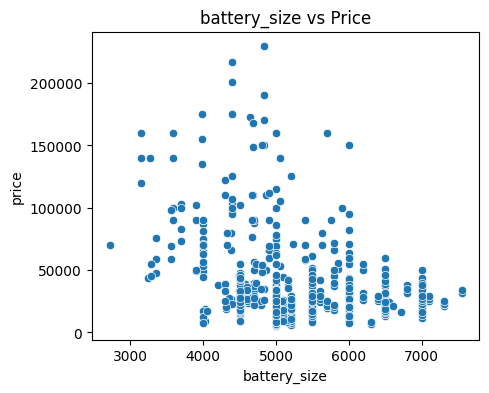

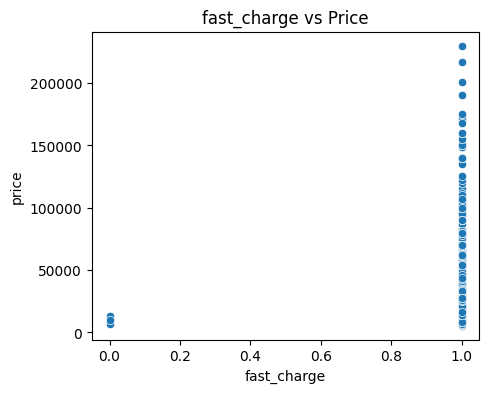

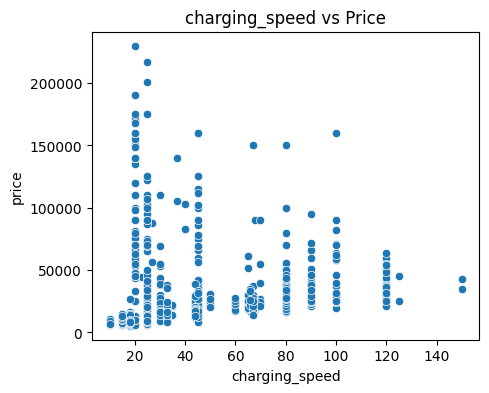

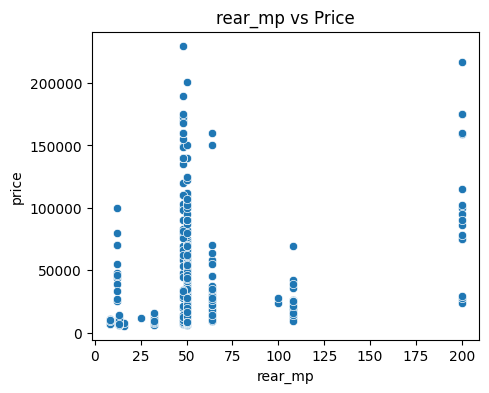

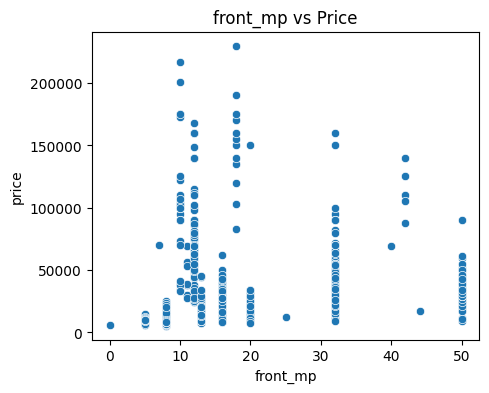

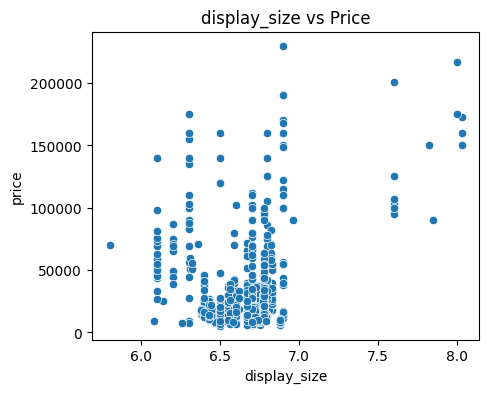

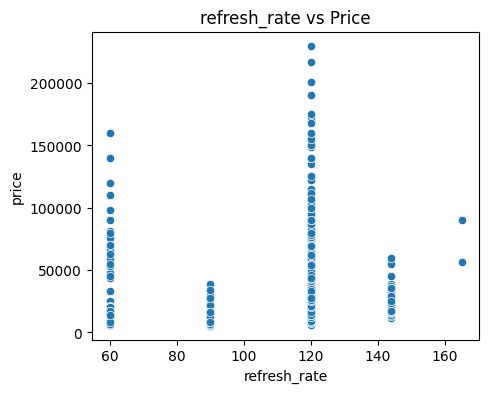

In [49]:
# non log price
for col in numerical_cols:
    plt.figure(figsize=(5,4))
    sns.scatterplot(x=df[col], y=df['price'])
    plt.title(f'{col} vs Price')
    plt.show()

In [50]:
cols=df_encoded.columns
cols

Index(['price', 'reting', 'is_5g', 'is_nfc', 'is_ir_blaster', 'core',
       'proccessor_speed', 'ram', 'internal_memory', 'battery_size',
       'fast_charge', 'charging_speed', 'rear_mp', 'front_mp', 'display_size',
       'refresh_rate', 'brand_Apple', 'brand_Cmf', 'brand_Google', 'brand_Hmd',
       'brand_Honor', 'brand_Infinix', 'brand_Iqoo', 'brand_Lava',
       'brand_Motorola', 'brand_Nothing', 'brand_Oneplus', 'brand_Oppo',
       'brand_Poco', 'brand_Realme', 'brand_Samsung', 'brand_Tecno',
       'brand_Vivo', 'brand_Xiaomi', 'processor_brand_Dimensity',
       'processor_brand_Exynos', 'processor_brand_Helio',
       'processor_brand_Snapdragon', 'processor_brand_Tensor',
       'processor_brand_Tiger', 'processor_brand_Unisoc', 'os_iOS'],
      dtype='object')

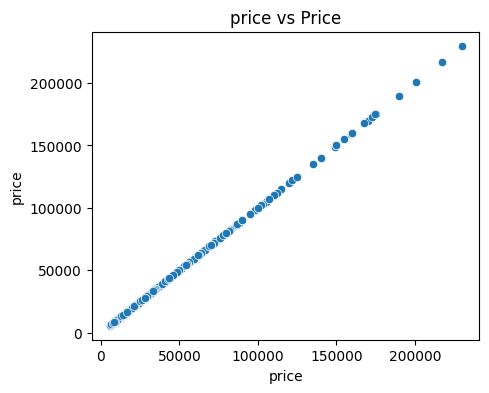

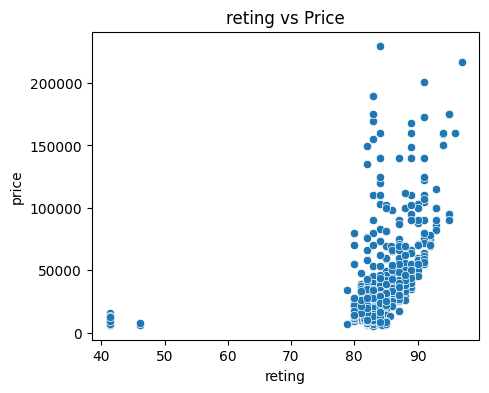

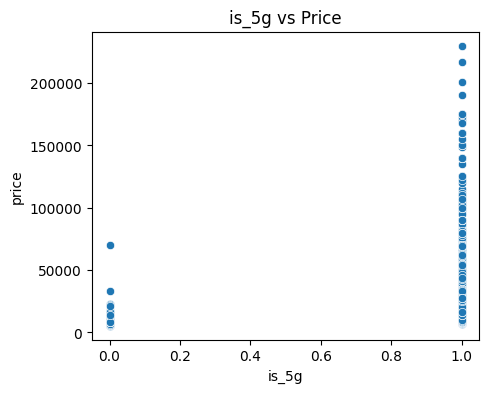

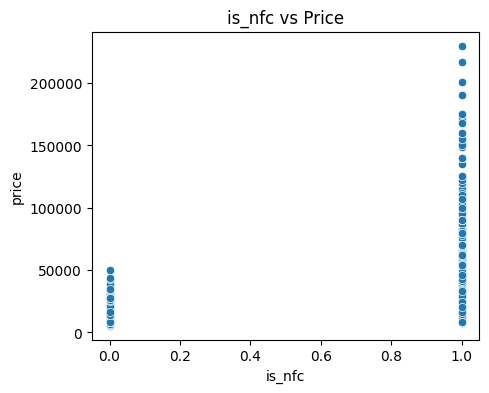

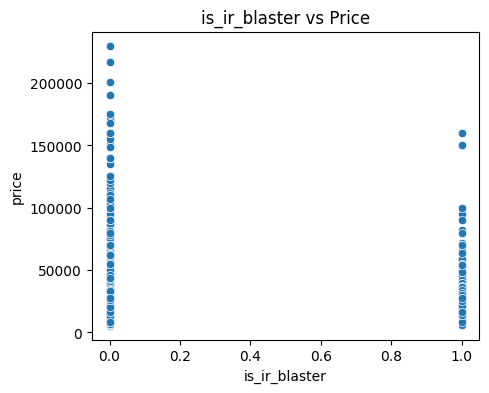

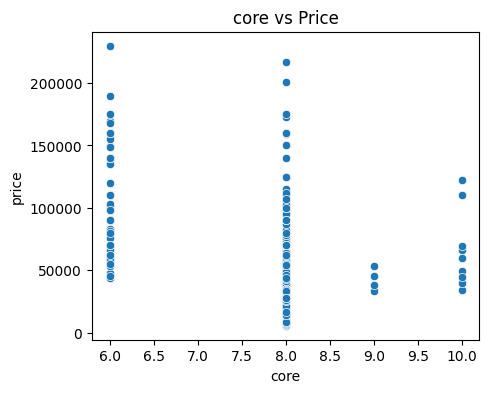

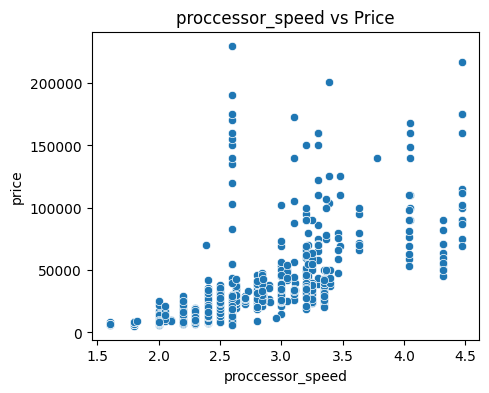

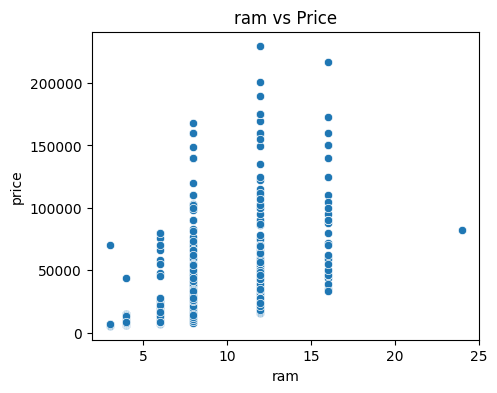

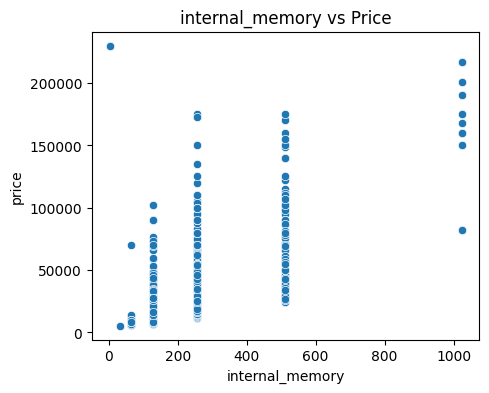

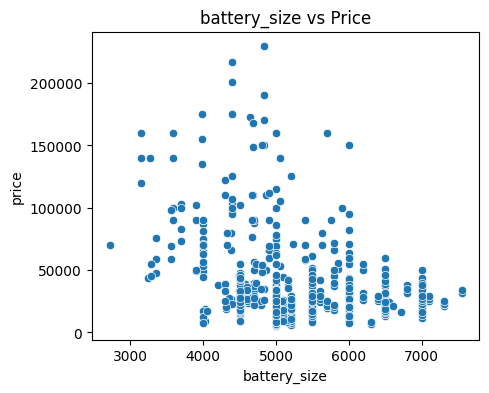

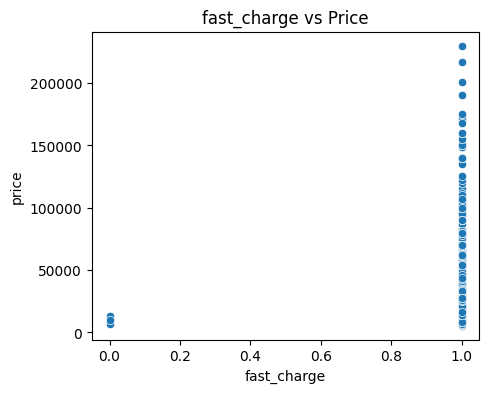

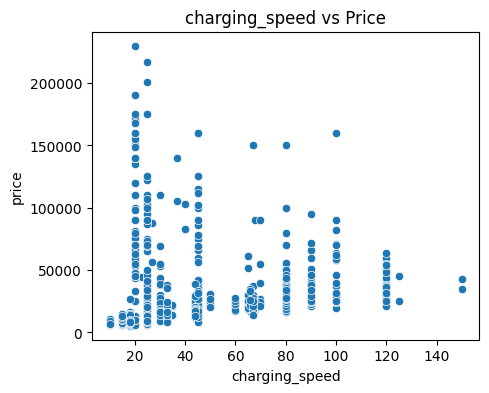

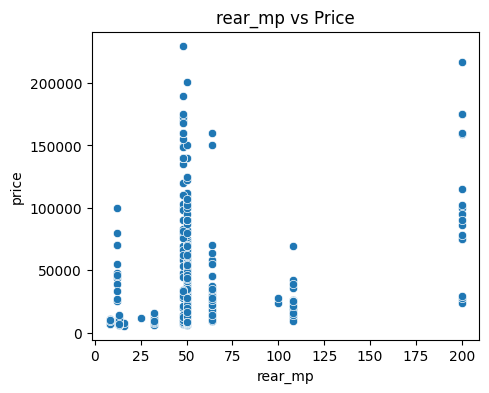

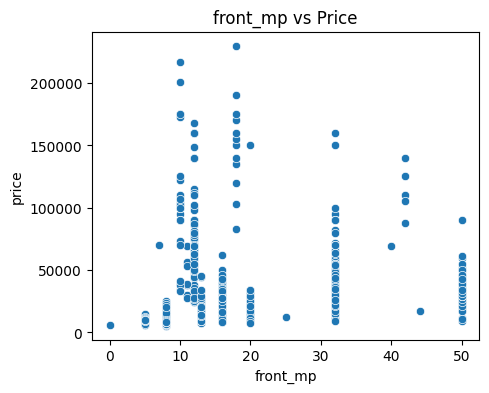

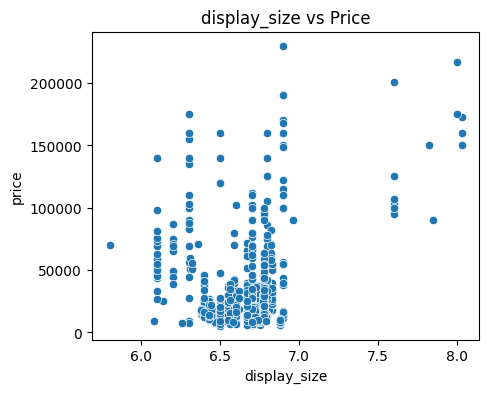

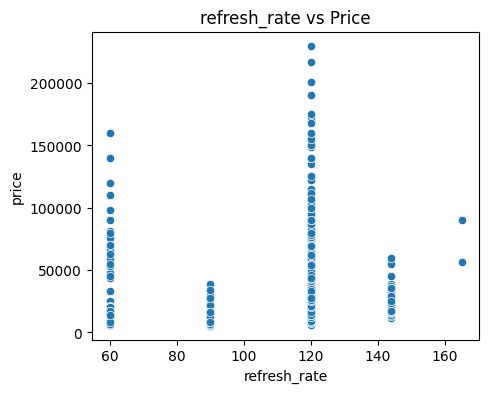

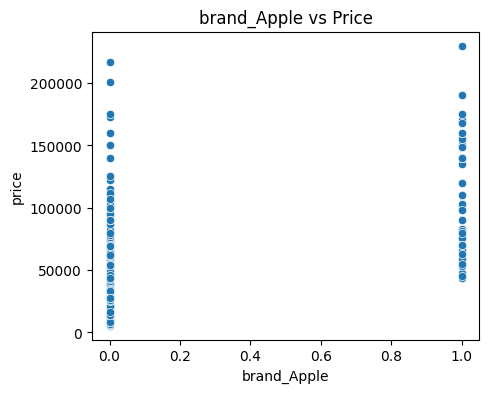

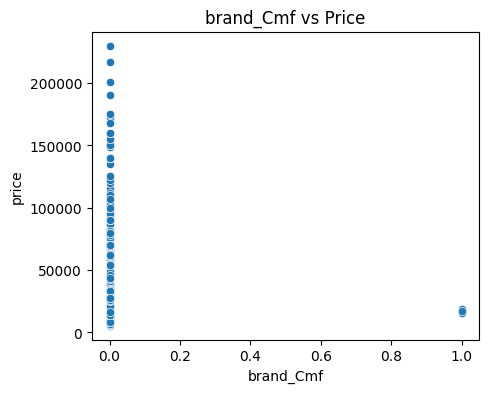

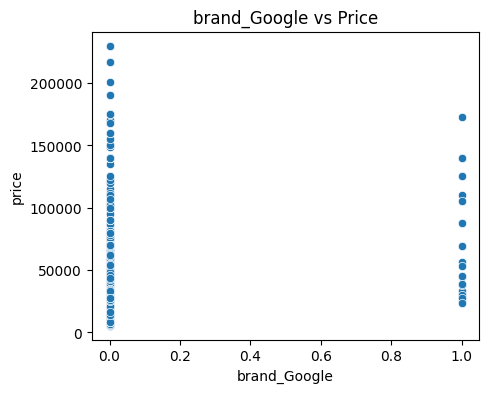

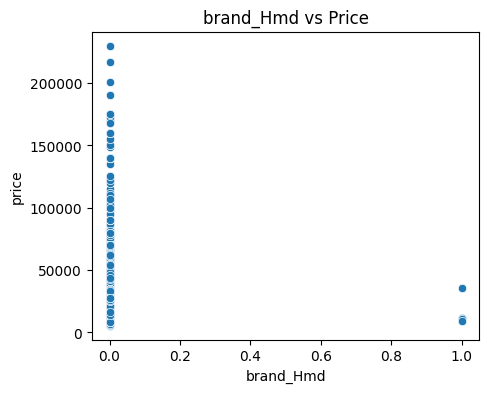

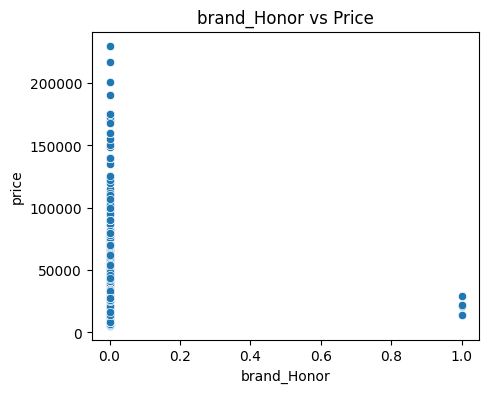

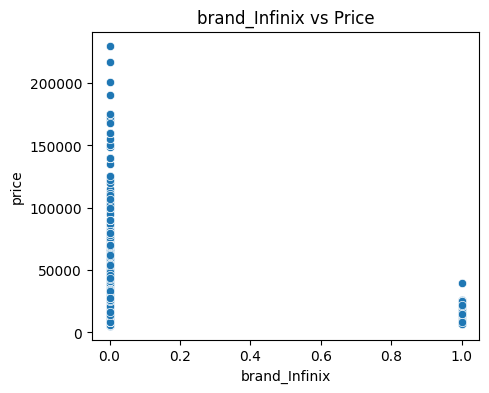

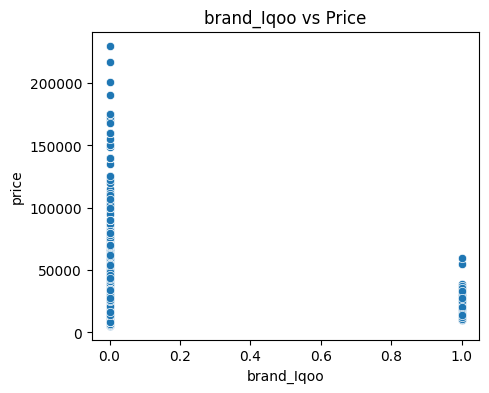

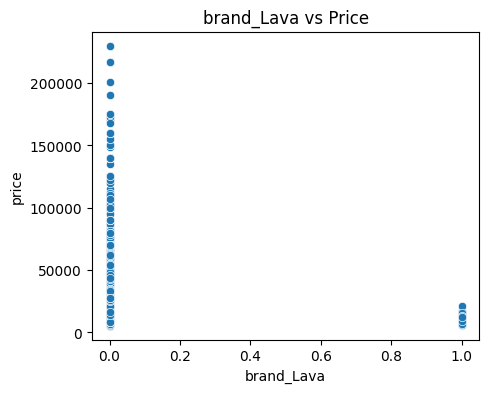

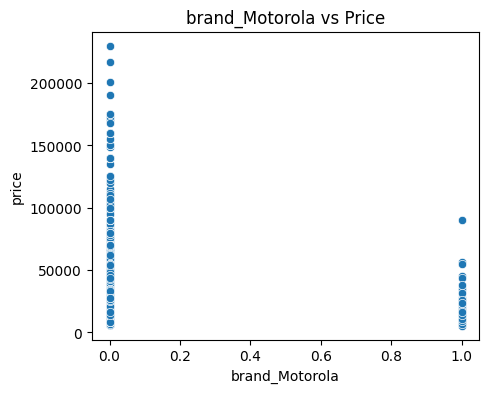

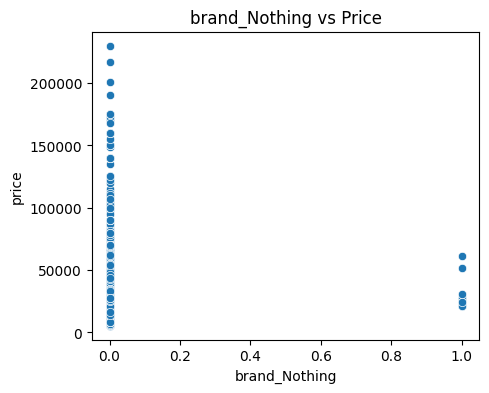

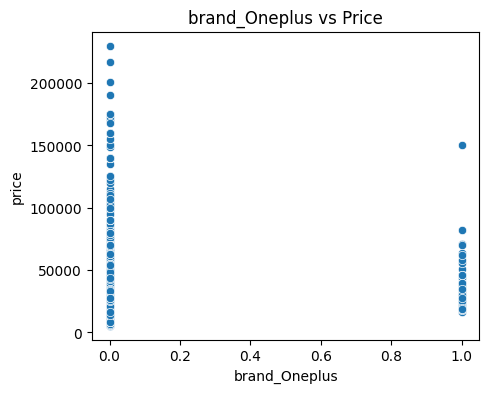

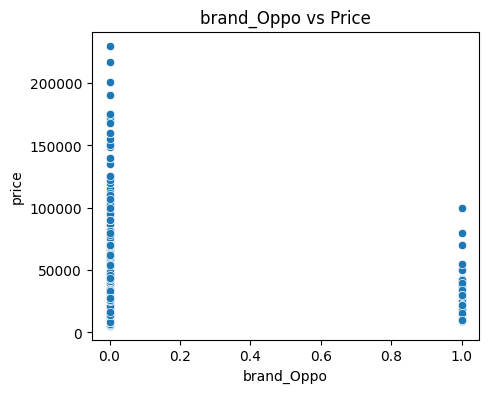

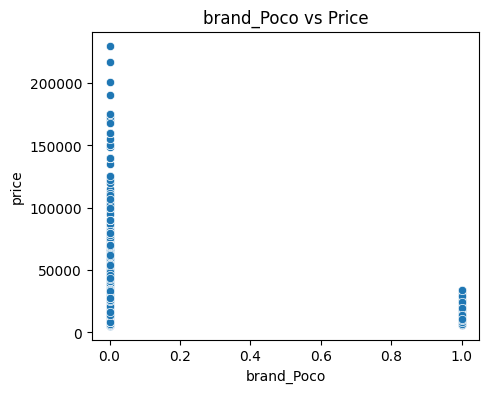

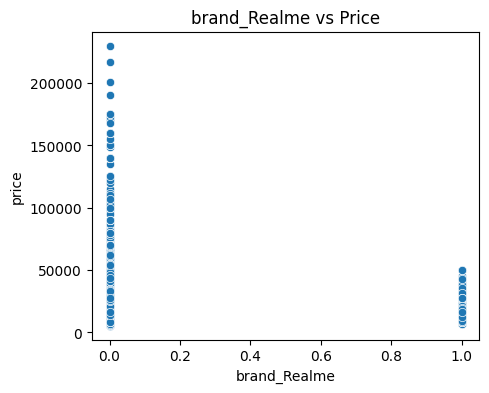

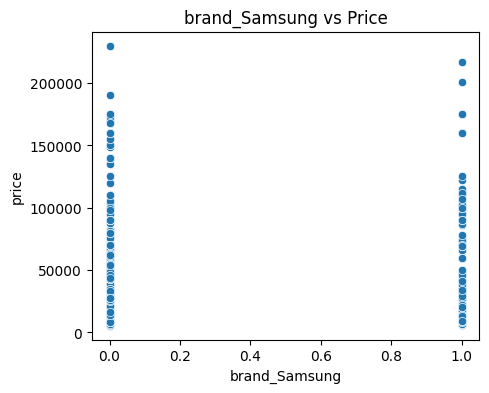

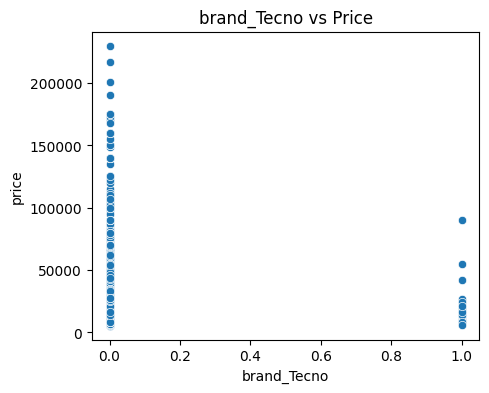

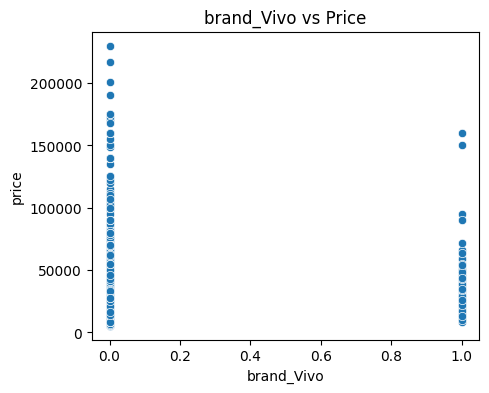

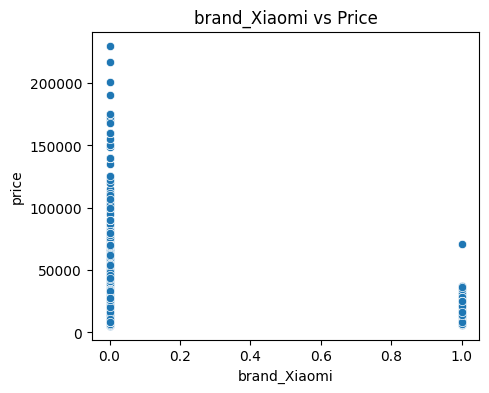

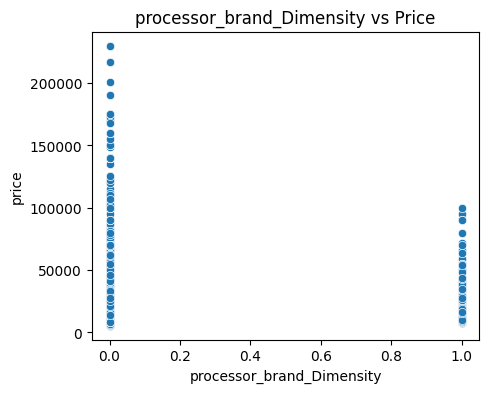

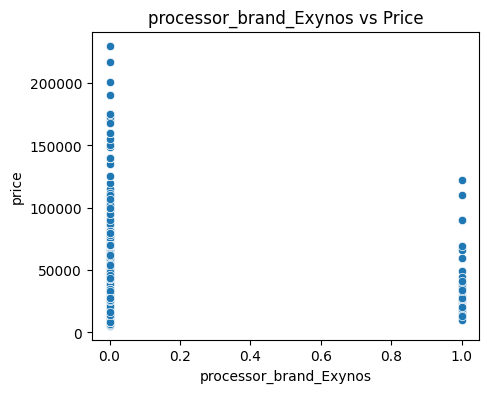

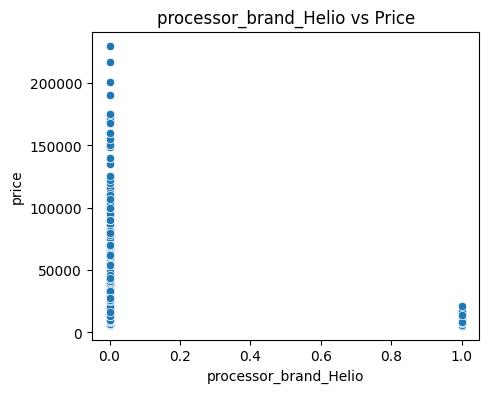

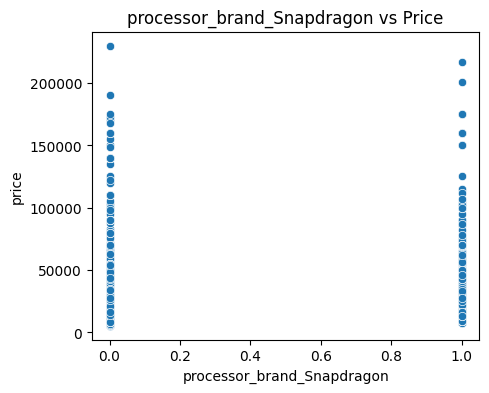

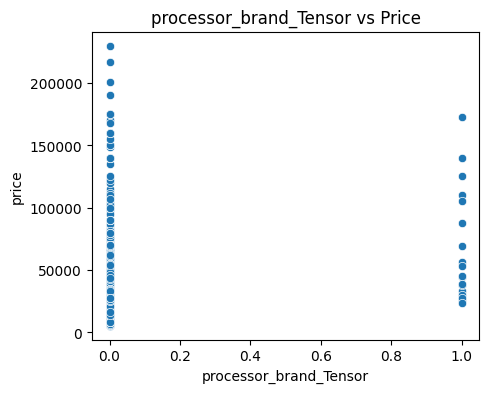

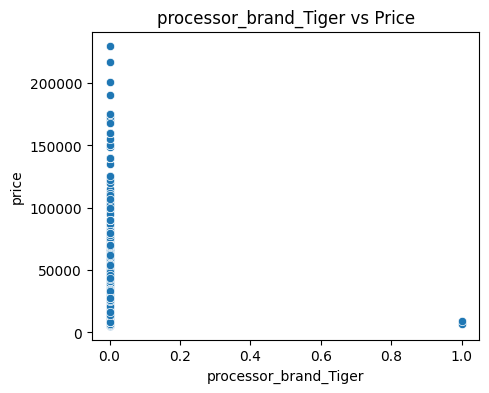

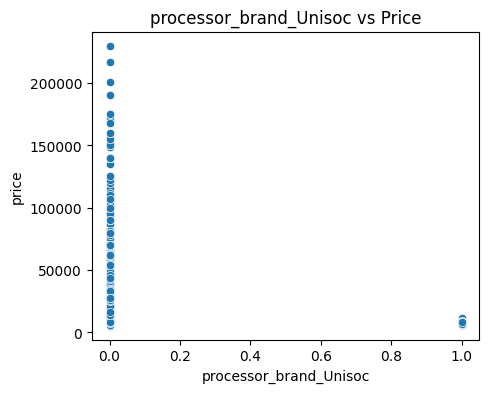

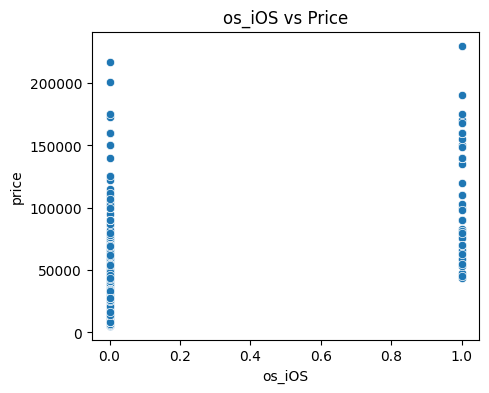

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in cols:
    plt.figure(figsize=(5,4))
    sns.scatterplot(x=df_encoded[col], y=df_encoded['price'])
    plt.title(f'{col} vs Price')
    plt.show()

In [104]:
import numpy as np

class GDRegressor:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
        self.cost_history = []  # track cost per epoch

    def compute_cost(self, X_train, y_train):
        m = len(y)
        y_hat = np.dot(X_train, self.coef_) + self.intercept_
        cost = (1/(2*m)) * np.sum((y_train - y_hat)**2)
        return cost

    def fit(self, X_train, y_train):
        # initialize coefficients
        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1])
        self.cost_history = []

        for i in range(self.epochs):
            # predictions
            y_hat = np.dot(X_train, self.coef_) + self.intercept_

            # compute derivatives
            intercept_der = -2 * np.mean(y_train - y_hat)
            coef_der = -2 * np.dot((y_train - y_hat), X_train) / X_train.shape[0]

            # update parameters
            self.intercept_ -= self.lr * intercept_der
            self.coef_ -= self.lr * coef_der

            # compute and save cost
            cost = self.compute_cost(X_train, y_train)
            self.cost_history.append(cost)

    def predict(self, X_test):
        return np.dot(X_test, self.coef_) + self.intercept_

    def get_coef(self):
        return self.coef_

    def get_intercept(self):
        return self.intercept_


In [140]:
gd=GDRegressor(epochs=1000,learning_rate=0.01)

In [141]:
gd.fit(X_train_scaled,y_train)

In [142]:
gd.get_coef()

array([ 3430.9722292 , -2123.94617721,  1978.05301568,   335.09686686,
        2170.4733151 ,  6061.19957674,  4294.68256759,  8493.79298112,
       -3771.90219662,  -369.09416587, -3507.14245871,  2300.02683345,
        -434.01301186,  9201.29265625,  3924.70528761,  7930.25897126,
        -559.48220804,  1776.20971208,  -728.87150511,  -976.79114192,
       -2869.71566637,  -501.04236089,  1425.25728955, -1695.76304551,
       -1214.83028704,  -307.55855528,  1168.08872812, -2530.52954299,
        -767.318404  ,  3107.9798309 , -2326.32207872,  1419.0389965 ,
       -1504.82844492, -2029.41511869, -2536.40555803,   268.06957962,
        -750.88206582,  1776.20971208,  -415.25012671,   206.88924322,
        7930.25897126])

In [143]:
gd.get_intercept()

np.float64(32033.28466831124)

In [144]:
y_pred=gd.predict(X_test_scaled)
r2_score(y_test,y_pred)

0.7400136406837013

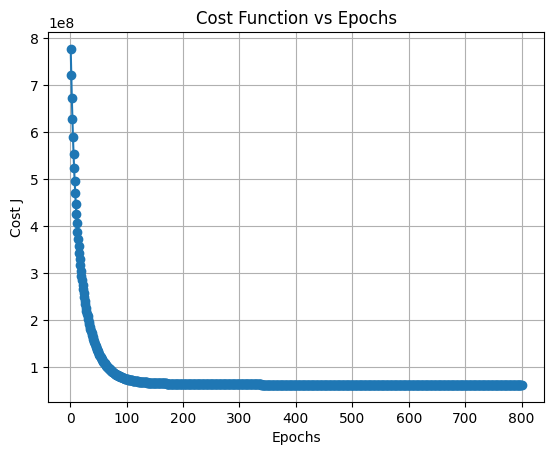

In [147]:
# Initialize the gradient descent model
model = GDRegressor(epochs=800,learning_rate=0.01)

# Fit the model on your scaled data
model.fit(X_train_scaled, y_train)

# Visualize cost vs epochs
import matplotlib.pyplot as plt

plt.plot(range(1, len(model.cost_history)+1), model.cost_history, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Cost J')
plt.title('Cost Function vs Epochs')
plt.grid(True)
plt.show()
